## Нейронная сеть для классификации опухолей

In [1]:
import sklearn.datasets # библиотека для скачивания датасета 
import numpy as np
import matplotlib.pyplot as plt
import threading
plt.style.use("seaborn")

m:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Загрузка датасета

In [4]:
breast_cancer = sklearn.datasets.load_breast_cancer() # Скачиваем датасет
breast_cancer.feature_names


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# Разделение на обучающую и тестовые выборки

In [5]:
# Отделяем данные из датасета
dataset = [(breast_cancer.data[i][None, ...], breast_cancer.target[i]) for i in range(len(breast_cancer.target))]
trainSize = 0.9 # Доля данных для обучения
train_len = int(len(dataset) * trainSize) # Размер данных для обучения
# Разделяем данные для обучения и для теста где 90% для обучения и 10% для теста
X_train, Y_train = zip(*dataset[:train_len])
X_test, Y_test = zip(*dataset[train_len:])
X_train = np.concatenate(X_train, axis=0)
X_test = np.concatenate(X_test, axis=0)


# Класс нейронной сети

In [6]:
class Perceptron:
    
    def __init__ (self):
        "Объявление весов и смещения"
        self.w = None
        self.b = None
            
    def model(self, x):
        "Функция активации, ступенька"
        return 1 if (np.dot(self.w, x) >= self.b) else 0
    
    def predict(self, X):
        "Предсказание нейронной сети"
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

    def calc_accuracy(self, Y_pred_test, Y_test):
        "Рассчет точности предсказаний"
        correct = 0
        for predict, test in zip(Y_pred_test, Y_test):
            if predict == test:
                correct += 1
        acc = correct / len(Y_pred_test)
        return acc
    
    def fit(self, X, Y, epochs = 1, lr = 1):
        "Обучение нейронной сети"
        self.w = np.ones(X.shape[1])
        self.b = 0
        
        accuracy = {}
        max_accuracy = 0

        wt_matrix = []

        for i in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.model(x)
                if y == 1 and y_pred == 0:
                    self.w = self.w + lr * x
                    self.b = self.b - lr * 1
                elif y == 0 and y_pred == 1:
                    self.w = self.w - lr * x
                    self.b = self.b + lr * 1

            wt_matrix.append(self.w)    
            accuracy[i] = self.calc_accuracy(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                j = i
                chkptw = self.w
                chkptb = self.b

        self.w = chkptw
        self.b = chkptb

        print(max_accuracy,j)
        plt.plot(list(accuracy.values()))
        plt.xlabel("Epoch #")
        plt.ylabel("Accuracy")
        plt.ylim([0, 1])
        plt.show()

        return np.array(wt_matrix)

In [7]:
perceptron = Perceptron()


0.95703125 34060


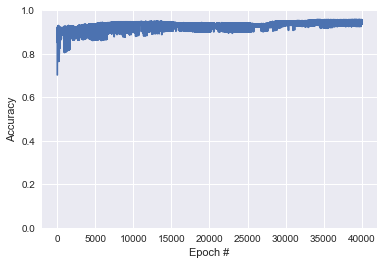

In [8]:
wt_matrix = perceptron.fit(X_train, Y_train, 40000, 0.3)

In [9]:
def calc_accuracy(Y_pred_test, Y_test):
        correct = 0
        for predict, test in zip(Y_pred_test, Y_test):
            if predict == test:
                correct += 1
        acc = correct / len(Y_pred_test)
        return acc
Y_pred_test = perceptron.predict(X_test)
print(calc_accuracy(Y_pred_test, Y_test))


0.9298245614035088


In [14]:
perceptron1 = Perceptron()


0.984375 8711


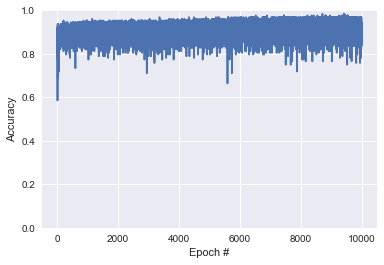

0.96875 404


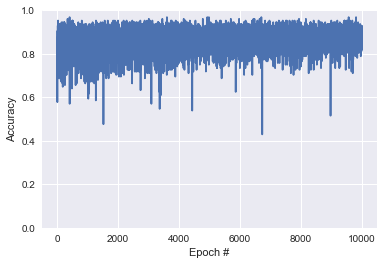

0.9609375 3656


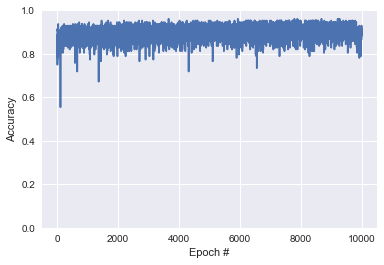

0.9765625 944


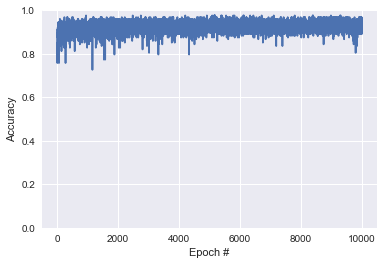

In [19]:
batchSize = 128
count = len(X_train) // batchSize
tread_arr = []
for i in range(count):
    X_batch = X_train[i * batchSize: i * batchSize + batchSize]
    Y_batch = Y_train[i * batchSize: i * batchSize + batchSize]
    thread = threading.Thread(target=perceptron1.fit, args=(X_batch, Y_batch, 10000, 0.3,))
    tread_arr.append(thread)
    thread.start()
for i in range(count):   
    tread_arr[i].join()  

In [21]:
def calc_accuracy(Y_pred_test, Y_test):
        correct = 0
        for predict, test in zip(Y_pred_test, Y_test):
            if predict == test:
                correct += 1
        acc = correct / len(Y_pred_test)
        return acc
Y_pred_test = perceptron1.predict(X_test)
print(calc_accuracy(Y_pred_test, Y_test))


0.9649122807017544
